# Лабораторная работа № 2
# Рожковой Марии 15-АС
# Вариант 20

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, classification_report, average_precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, precision_recall_curve, average_precision_score)
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

In [120]:
df = pd.read_csv(r'iris_data.txt', sep=',')
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
df.shape

(150, 5)

In [103]:
df.count()

sl       150
sw       150
pl       150
pw       150
class    150
dtype: int64

# 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Переменная 	Описание 	               Параметры(Ключи)
sl 	        длина чашелистника в см    любой числовой
sw 	        ширина чашелистника в см   любой числовой
pl 	        длина лепестка в см 	   любой числовой
pw 	        ширина лепестка в см 	   любой числовой
class 	    вид 	                   1. Iris Setosa 2. Iris Versicolour 3. Iris Virginica




Задача: по данным признакам предсказать класс растения.

Лишних признаков нет


# 2.Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [104]:
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(147, 5)

In [105]:
df.count()

sl       147
sw       147
pl       147
pw       147
class    147
dtype: int64

In [106]:
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 3.Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая).

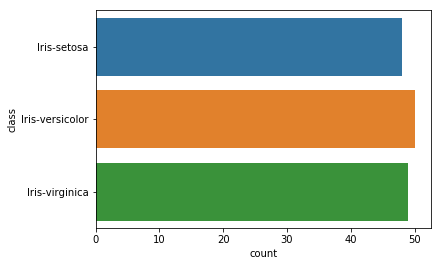

In [107]:
sns.countplot(data=df, y='class')
plt.show()

Соотношение элементов незначительно отличается, считаем, что классы сбалансированны.

# 4.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. 

In [108]:
# выделим категориальные и числовые(количественные) признаки
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['sl', 'sw', 'pl', 'pw']
categorial:  ['class']


In [109]:
df['class'] = df['class'].apply(lambda x: str(x))

#заново выделим категориальные и числовые
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['sl', 'sw', 'pl', 'pw']
categorial:  ['class']


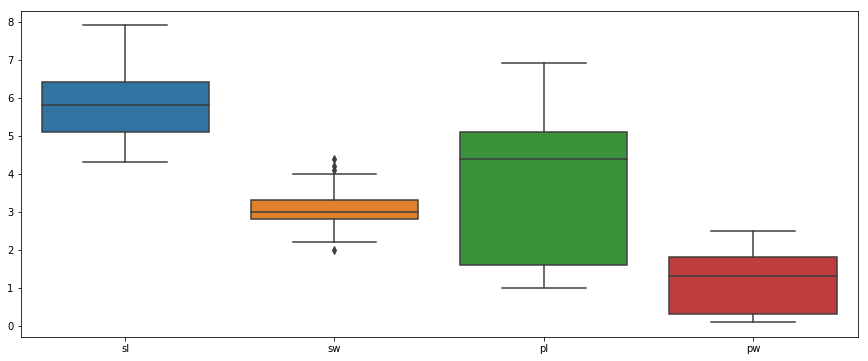

In [110]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

В качестве способа масштабирования выберем метод нормализации, т.к. устраняет шум перед использованием классификатора.

In [111]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,sl,sw,pl,pw,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


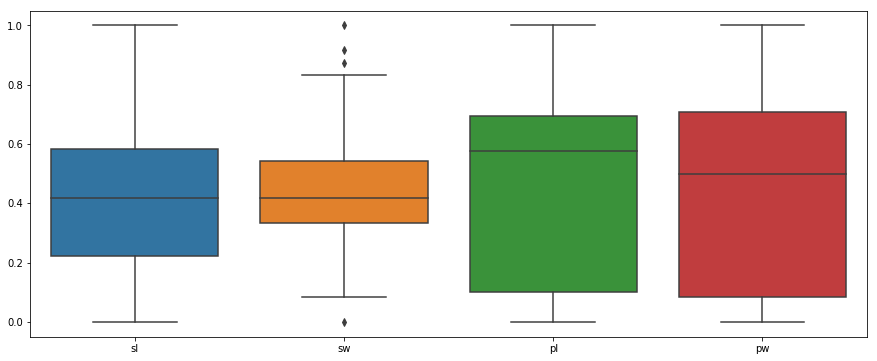

In [112]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df[numerical_columns])
plt.show()

# 5.Выполните замену категориальных признаков.

In [123]:
lb_make = LabelEncoder() 
df["class"] = lb_make.fit_transform(df["class"])
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 6.Оцените корреляцию между признаками.

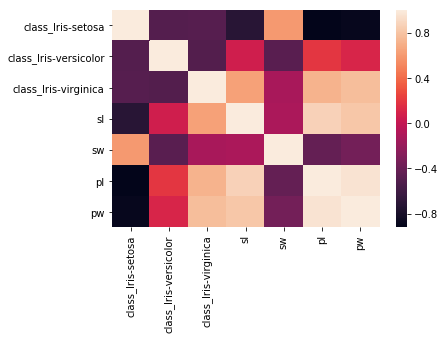

,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica,sl,sw,pl,pw
class_Iris-setosa,1.000000,-0.499922,-0.492366,-0.712972,0.600299,-0.920583,-0.883967
class_Iris-versicolor,-0.499922,1.000000,-0.507673,0.069111,-0.471115,0.196464,0.111365
class_Iris-virginica,-0.492366,-0.507673,1.000000,0.639795,-0.123702,0.718334,0.767432
sl,-0.712972,0.069111,0.639795,1.000000,-0.109321,0.871305,0.817058
sw,0.600299,-0.471115,-0.123702,-0.109321,1.000000,-0.421057,-0.356376
pl,-0.920583,0.196464,0.718334,0.871305,-0.421057,1.000000,0.961883
pw,-0.883967,0.111365,0.767432,0.817058,-0.356376,0.961883,1.000000


In [115]:
df_corr = df.corr()
sns.heatmap(df_corr)
plt.show()
df_corr

# 7.Заполните пропущенные значения в данных

Пропущенных значений нет

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 7 columns):
class_Iris-setosa        147 non-null uint8
class_Iris-versicolor    147 non-null uint8
class_Iris-virginica     147 non-null uint8
sl                       147 non-null float64
sw                       147 non-null float64
pl                       147 non-null float64
pw                       147 non-null float64
dtypes: float64(4), uint8(3)
memory usage: 5.1 KB


# 8.Решите поставленную задачу классификации в соответствии с заданием. Классификаторы 1,4.

In [125]:
# Решающее дерево
dtc = DecisionTreeClassifier()
X, y = df.drop('class', axis=1), df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
params = {'max_depth': list(range(1,5)), 'max_features': list(range(1,5))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit(X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score, 
      '\t at features number:', best_features,
      '\t at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 0.9428571428571428 	 at features number: 2 	 at depth: 4
test score:  0.911111111111


In [127]:
# K ближайщих соседей
knn = neighbors.KNeighborsClassifier()
df1 = df.copy()
params = {'n_neighbors': list(range(1,5))}
knn_grid = GridSearchCV(knn, params)
knn_grid.fit(X_train, y_train)
best_num = knn_grid.best_estimator_.n_neighbors
best_score = knn_grid.best_score_

print('best train score: ', best_score,
      '\t at neighbors number: ', best_num)

best train score:  0.9619047619047619 	 at neighbors number:  1


# 9.Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


# Вывод:

Классификаторы дерево принятия решений и k ближайших соседей(количество ближайших объектов) имеют примерно одинаковые показатели качества относительно PR и ROC кривых. В целом, данные классификаторы правильно решают задачу предсказания класса с вероятностью 0.94~0.96, что достаточно точно.